<a href="https://colab.research.google.com/github/KarimeZeraik/QSAR-and-ML/blob/main/QSAR_Trypanosoma_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Building QSAR-based Machine Learning models for virtual screening of drug candidates against *Trypanosoma* spp.**

### Importing and visualizing the pre-processed database

In [ ]:
# Importing the dataset

from google.colab import files
uploaded = files.upload()

Saving dataset_final.csv to dataset_final (1).csv


In [ ]:
# Visualizing the imported dataset

import pandas as pd
df1 = pd.read_csv("dataset_final.csv")
display (df1)

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.455932
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.236572
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.795880
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.782516
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.148742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,21603,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.229148
21604,21604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.795880
21605,21605,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.920819
21606,21606,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.221849


In [ ]:
# Removing non-informative variable
df1 = df1.drop("Unnamed: 0", axis = 1)

In [ ]:
# Removing empty rows (independent variables)
df1 = df1.dropna()

In [ ]:
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.236572
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.795880
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.782516
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.148742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.229148
21604,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.795880
21605,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.920819
21606,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.221849


In [ ]:
# Removing infinite values
import pandas as pd

# Replacing infinite values with NaN
df1.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Removing rows containing NaN
df1.dropna(inplace=True)

In [ ]:
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.236572
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.79588
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.782516
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.148742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.229148
21604,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.79588
21605,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.920819
21606,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.221849


### Importing and pre-processing external dataset

###**Building ML models**

In [ ]:
x = df1.drop("pIC50", axis = 1)
y = df1["pIC50"]

In [ ]:
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21604,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21605,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21606,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Removing descriptors with low variance
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1,1,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
21604,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21605,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
21606,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        7.455932
1        7.236572
2         7.79588
3        7.782516
4        7.148742
           ...   
21603    5.229148
21604     6.79588
21605    5.920819
21606    6.221849
21607    5.679854
Name: pIC50, Length: 21595, dtype: object

### Split the data into training and test sets

In [ ]:
#  Importing packages for visualizing Machine Learning model results
import seaborn as sns


# Importing packages for splitting the data into training and test sets
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=100)

### **Machine learning model**

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

modelo1 = XGBRegressor()           #Insert model here
modelo1.fit(x_treino, y_treino)



y_predito1 = modelo1.predict(x_teste)


# Calculating R²
r2_treino = modelo1.score(x_treino, y_treino)
print("R2 treino : " + str(r2_treino))

# Test results
r2_teste = modelo1.score(x_teste, y_teste)
print("R2 teste : " + str(r2_teste))

# Calculating MSE (Mean Squared Error)
mse_treino = mean_squared_error(y_treino, modelo1.predict(x_treino))
print("MSE treino : " + str(mse_treino))

mse_teste = mean_squared_error(y_teste, y_predito1)
print("MSE teste : " + str(mse_teste))

# Calculating RMSE (Root Mean Squared Error)
rmse_treino = np.sqrt(mse_treino)
print("RMSE treino : " + str(rmse_treino))

rmse_teste = np.sqrt(mse_teste)
print("RMSE teste : " + str(rmse_teste))

# Calculating MAE (Mean Absolute Error)
mae_treino = mean_absolute_error(y_treino, modelo1.predict(x_treino))
print("MAE treino : " + str(mae_treino))

mae_teste = mean_absolute_error(y_teste, y_predito1)
print("MAE teste : " + str(mae_teste))

R2 treino : 0.7846611072477556
R2 teste : 0.6415544732975113
MSE treino : 0.2918282422539073
MSE teste : 0.4752736820872171
RMSE treino : 0.5402112940821464
RMSE teste : 0.6894009588673468
MAE treino : 0.38924698116159717
MAE teste : 0.5047826727604342


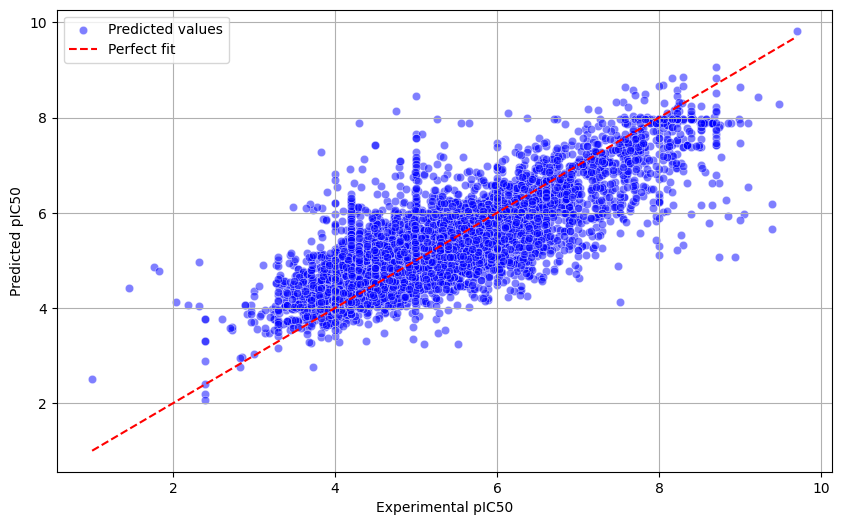

In [ ]:
# Plotting the graph of experimental versus predicted values
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste, y=y_predito1, alpha=0.5, label='Predicted values', color='b')
sns.lineplot(x=[y_teste.min(), y_teste.max()], y=[y_teste.min(), y_teste.max()], color='r', linestyle='--', label='Perfect fit')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.legend()
plt.grid(True)
plt.show()

### Residual plot for the training set

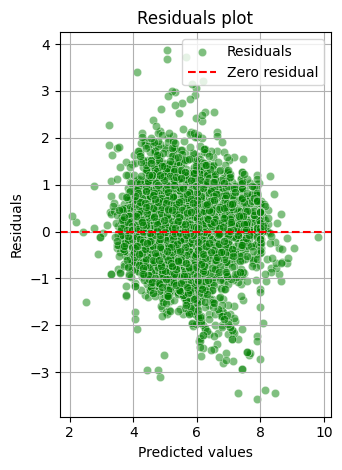

In [ ]:
# Plotting the residuals graph
residuos = y_teste - y_predito1

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_predito1, y=residuos, alpha=0.5, label='Residuals', color='g')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Removing outliers

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Calculating the residuals
residuos = y_teste - y_predito1

# Calculating the standard deviation of the residuals
desvio_padrao_residuos = np.std(residuos)

# Defining a threshold to identify outliers
limite = 2.0 * desvio_padrao_residuos

# Finding indices of points that are beyond the threshold
indices_outliers = np.where(np.abs(residuos) > limite)

# Removing outliers from the data
x_teste_sem_outliers = np.delete(x_teste, indices_outliers, axis=0)
y_teste_sem_outliers = np.delete(y_teste, indices_outliers)

# Build the model with the data without outliers

modelo_sem_outliers = XGBRegressor()                             # Insert model here
modelo_sem_outliers.fit(x_treino, y_treino)


# Calculate predictions for the training and test data
y_predito_treino_sem_outliers = modelo_sem_outliers.predict(x_treino)
y_predito_teste_sem_outliers = modelo_sem_outliers.predict(x_teste_sem_outliers)

# Calculate R² for the training and test data without outliers
r2_sem_outliers_treino = modelo_sem_outliers.score(x_treino, y_treino)
r2_sem_outliers_teste = modelo_sem_outliers.score(x_teste_sem_outliers, y_teste_sem_outliers)

# Calculate RMSE for the training and test data without outliers
rmse_sem_outliers_treino = np.sqrt(mean_squared_error(y_treino, y_predito_treino_sem_outliers))
rmse_sem_outliers_teste = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers))

# Calculate MAE for the training and test data without outliers
mae_sem_outliers_treino = np.mean(np.abs(y_treino - y_predito_treino_sem_outliers))
mae_sem_outliers_teste = np.mean(np.abs(y_teste_sem_outliers - y_predito_teste_sem_outliers))

# Calculate MSE for the training and test data without outliers
mse_sem_outliers_treino = mean_squared_error(y_treino, y_predito_treino_sem_outliers)
mse_sem_outliers_teste = mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers)

# Printing the results
print("R2 treino (sem outliers): " + str(r2_sem_outliers_treino))
print("R2 teste (sem outliers): " + str(r2_sem_outliers_teste))
print("RMSE treino (sem outliers): " + str(rmse_sem_outliers_treino))
print("RMSE teste (sem outliers): " + str(rmse_sem_outliers_teste))
print("MAE treino (sem outliers): " + str(mae_sem_outliers_treino))
print("MAE teste (sem outliers): " + str(mae_sem_outliers_teste))
print("MSE treino (sem outliers): " + str(mse_sem_outliers_treino))
print("MSE teste (sem outliers): " + str(mse_sem_outliers_teste))

R2 treino (sem outliers): 0.7846611072477556
R2 teste (sem outliers): 0.7616366838169931
RMSE treino (sem outliers): 0.5402112940821464
RMSE teste (sem outliers): 0.542288069566571
MAE treino (sem outliers): 0.3892469811615972
MAE teste (sem outliers): 0.4289811629558642
MSE treino (sem outliers): 0.2918282422539073
MSE teste (sem outliers): 0.29407635039423824


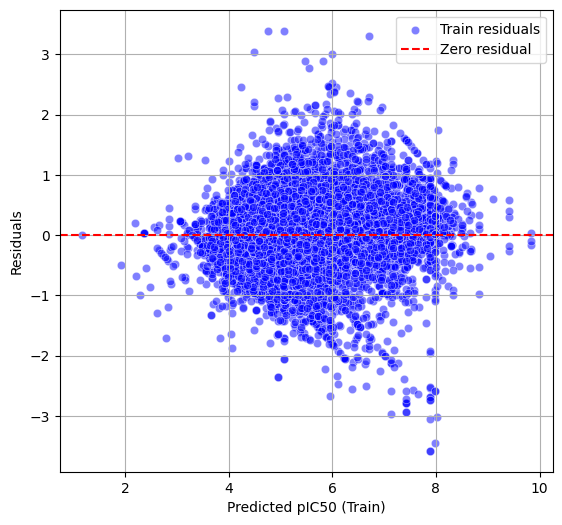

In [ ]:
# Calculating residuals for training and test data
residuos_treino = y_treino - y_predito_treino_sem_outliers
residuos_teste = y_teste_sem_outliers - y_predito_teste_sem_outliers

# Plotting the residuals graphs for training and test data
plt.figure(figsize=(14, 6))

# Residual plot for the training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_predito_treino_sem_outliers, y=residuos_treino, alpha=0.5, color='b', label='Train residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted pIC50 (Train)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

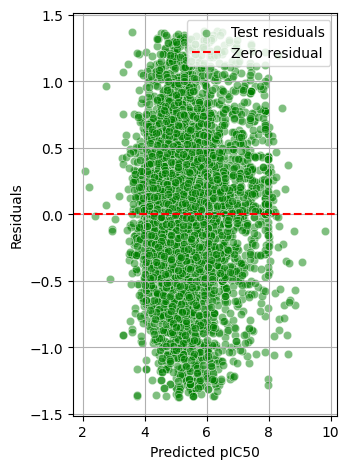

In [ ]:
# Residual plot for the test data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_predito_teste_sem_outliers, y=residuos_teste, alpha=0.5, color='g', label='Test residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

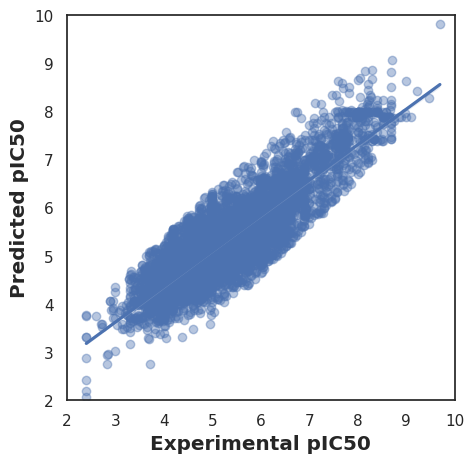

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Calculating the residuals
residuos = y_teste - y_predito1

# Calculating the square root of the mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_teste, y_predito1))

# Calculating the standard deviation of the residuals
desvio_padrao_residuos = np.std(residuos)

# Setting a threshold to identify outliers
limite = 2.0 * desvio_padrao_residuos

# Finding indices of points that are beyond the threshold
indices_outliers = np.where(np.abs(residuos) > limite)

# Removing outliers from the data
y_teste_sem_outliers = np.delete(y_teste, indices_outliers)
y_predito_sem_outliers = np.delete(y_predito1, indices_outliers)

# Ensure that the arrays y_teste_sem_outliers and y_predito_sem_outliers are of type float64
y_teste_sem_outliers = y_teste_sem_outliers.astype(np.float64)
y_predito_sem_outliers = y_predito_sem_outliers.astype(np.float64)

# Plotting the scatter plot without outliers
ax = sns.regplot(x=y_teste_sem_outliers, y=y_predito_sem_outliers, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show()

In [ ]:
y_teste_sem_outliers

array([4.60205999, 5.22184875, 7.        , ..., 4.        , 5.39179606,
       6.0619809 ])

# **External validation (ZINC-22 database)**

In [ ]:
# Importing the dataset

from google.colab import files
uploaded = files.upload()

Saving pubchem_descritores_ZINCRepurposing(1).csv to pubchem_descritores_ZINCRepurposing(1).csv


In [ ]:
# Visualizing the imported dataset

import pandas as pd
df2 = pd.read_csv("pubchem_descritores_ZINCRepurposing(1).csv")
display (df2)

,Unnamed: 0,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,ZINC000001530427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,ZINC000003807804,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,ZINC000000120286,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,ZINC000242548690,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ZINC000000008492,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1571,ZINC000022010387,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1572,1572,ZINC000022448097,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,1573,ZINC000100370145,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1574,1574,ZINC000059111167,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Removing non-informative variable
df2 = df2.drop("Unnamed: 0", axis = 1)
df2 = df2.drop("Name", axis = 1)

# Removing empty rows (independent variables)
df2 = df2.dropna()

In [ ]:
import pandas as pd

# Assuming that x_treino is your training DataFrame and df2 is the external DataFrame

# Obtaining the common columns in the same order as x_treino
common_columns = list(x_treino.columns.intersection(df2.columns))

# Checking if we have all the necessary columns
if set(common_columns) != set(x_treino.columns):
    raise ValueError("As colunas em df2 não correspondem completamente às colunas em x_treino.")

# Reordering the columns in the external DataFrame to match the column order of the training set
external_data_aligned = df2[common_columns]

# Making predictions using the aligned columns in the external data
predictions = modelo_sem_outliers.predict(external_data_aligned)

In [ ]:
predictions

array([3.9167912, 6.410694 , 4.9060354, ..., 4.462794 , 3.9941218,
       5.4466286], dtype=float32)

In [ ]:
# Saving the predicted dataset (predictions)

import pandas as pd

# Converting predictions to a DataFrame (if it's not already)
predicted_df = pd.DataFrame(predictions, columns=['Predicted_Column_Name'])  # Replace 'Predicted_Column_Name' with the appropriate name

# Saving the predicted data as a CSV file
predicted_df.to_csv('ZINC_XGB2_PREDICTED.csv', index=False)

# Triggering the download of the file in Google Colab
from google.colab import files
files.download('ZINC_XGB2_PREDICTED.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **SHAP values analysis**

In [ ]:
# Installing the shape value library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
# To calculate SHAP values ​​for the model, we need to create an "Explainer" object
# The Explainer object will be used to evaluate a sample or dataset with

# Importing the SHAP library
import shap

# Adjusting the explainer
explainer = shap.Explainer(modelo_sem_outliers.predict, x_teste_sem_outliers)
# Calculating SHAP values
shap_values = explainer(x_teste_sem_outliers, max_evals=600)

PermutationExplainer explainer:   8%|▊         | 504/6140 [02:46<33:30,  2.80it/s]

In [ ]:
# If we simply want the feature importances as determined by the SHAP algorithm,
# we need to get the average mean value of each feature
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculating the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculating the normalized version
    importances_norm = softmax(importances)
    # Organizing the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorting the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Printing the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

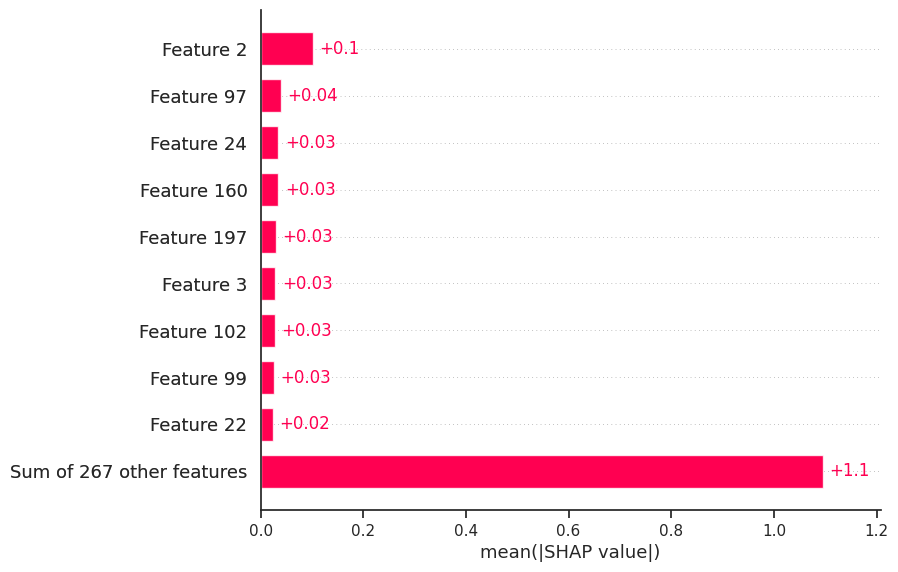

In [ ]:
# Analyzing the global effect of the features:
shap.plots.bar(shap_values)

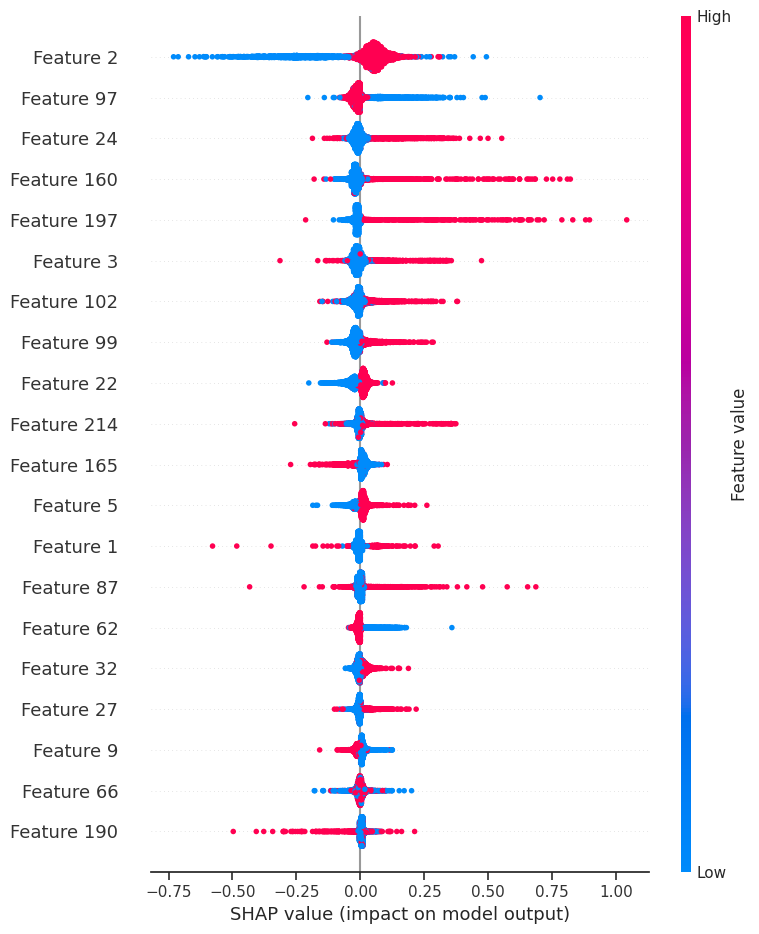

In [ ]:
# Feature importance summary chart: OPTION 1
shap.summary_plot(shap_values)

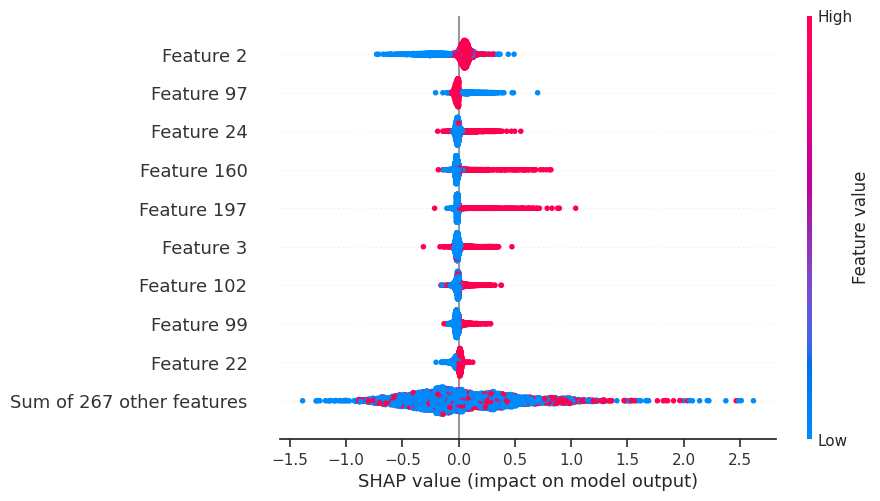

In [ ]:
# Feature importance summary chart: OPTION 2
shap.plots.beeswarm(shap_values)

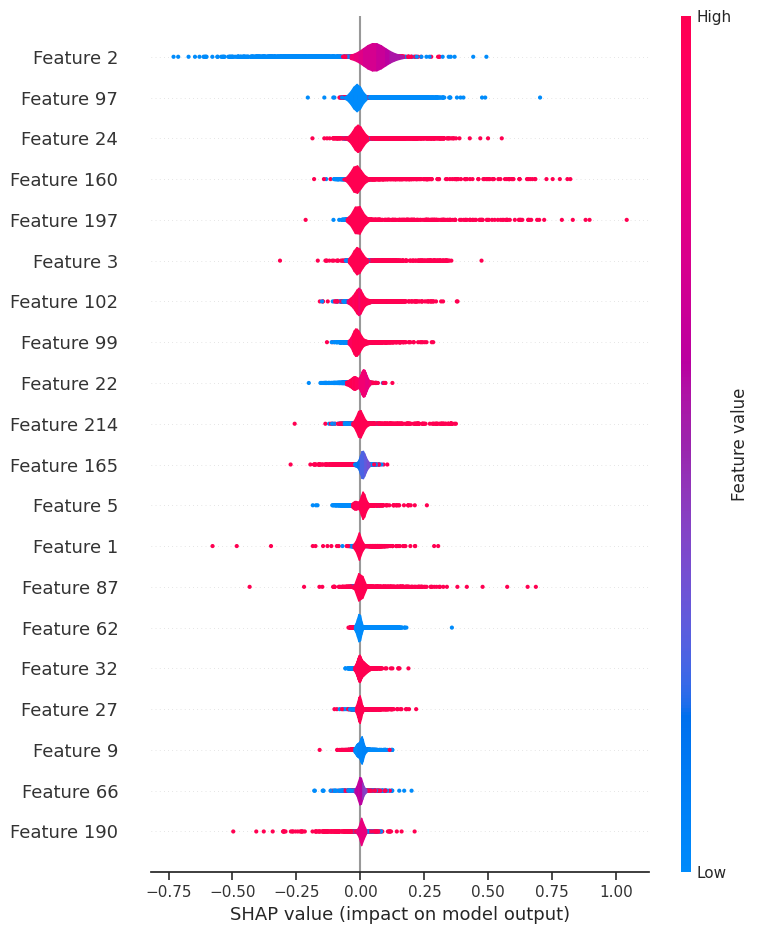

In [ ]:
# Feature importance summary chart: OPTION 3
shap.summary_plot(shap_values, plot_type='violin')

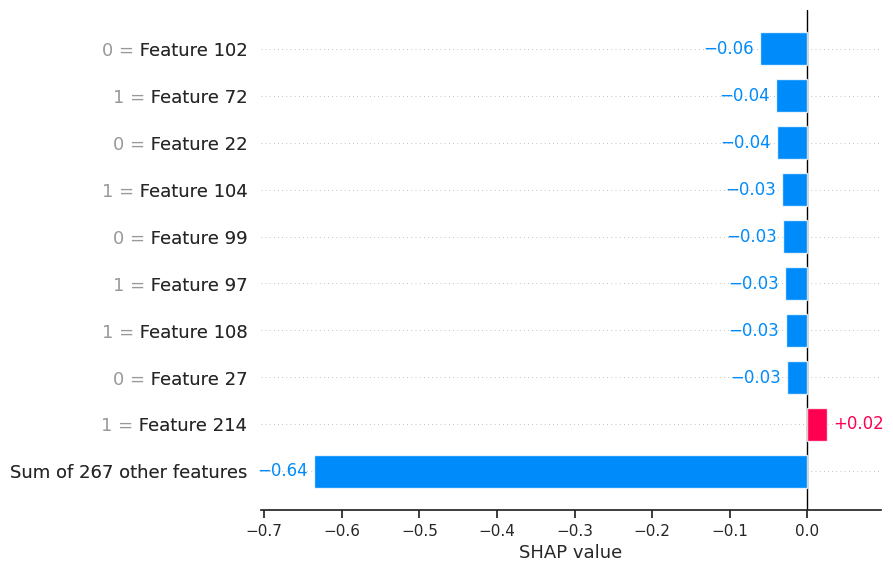

In [ ]:
# Building the local bar graph to analyze the local effect of each variable:
shap.plots.bar(shap_values[0])